<a href="https://colab.research.google.com/github/niharikasriparasa/IndicParser/blob/main/Paninian_Dependency_Parser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This collaborative notebook aims to formalize the IIITH Indic language parser using Paninian Grammar principles.

- A demonstration is available at the following link: https://ssmt.iiit.ac.in/parser

***Note*** : Another shallow parser developed by IIITH can be accessed here: https://ltrc.iiit.ac.in/analyzer/hindi/run.cgi. However, it does not provide tags for all tokens in a sentence, making the former option preferable."


# 1. Install

In [1]:
#Installations
!pip3 install requests
!pip3 install regex
!pip3 install pydot
!pip install graphviz

# 2. Helper Functions

In [4]:
#helper functions -Get response, Text to json, Visualize tree

import json
import requests
from IPython.display import Image
import numpy as np
import re
import pydot

def get_response(input,lang):

   # Define the URL and payload
   url = "https://ssmt.iiit.ac.in/myparser"
   payload = {
    "text": input,
    "language": lang,
    "mode": "ssf"
    }

   # Convert the payload to JSON format
   json_payload = json.dumps(payload)

   # Make the POST request
   headers = {'content-type' : 'application/json'}
   response = requests.post(url, data=json_payload,headers=headers)

   # Check if the request was successful
   if response.status_code == 200:
        #print("POST request successful!")
        #print("Response:")
        return response.text
   else:
        return("Error:", response.status_code)


def text_to_json(text):
# Regular expression pattern to extract the content between `<Sentence id="1">` and `</Sentence>`
    pattern = re.compile(r'<Sentence id=\\\"1\\\">\",(.*?)</Sentence>\"', re.DOTALL)
    match = pattern.search(text)
    if match:
        # Extracting the content
        content = match.group(1).strip()
        x=content.replace("\\t","")
        y=x.replace('"',"")
        a=y.replace("((",'')
        z=a.split('))')
        #print(z)
    p1=r"(\d+)([A-Z]+)"
    p2=r"(\d+\.\d+)([\u0900-\u097F]+)([A-Z_]+)(<.*?>)"
#p3=r"(\d+)([A-Z]+)|(\d+\.\d+)([\u0900-\u097F]+)([A-Z_]+)(<.*?>)" - Full regex expression

    data=[]
    for i in range(0,len(z)):
        match1=re.findall(p1,z[i])
        if match1:
            for (x,y) in match1:
                parent={
                    'id':x,
                    'pos':y
                }
            match2=re.findall(p2,z[i])
            arr=[]
            for x in match2:
                item={'id':x[0],'token':x[1],'pos':x[2],'fs':x[3]}
                arr.append(item)
            parent['child']=(arr)
        else:
            assert('no match')
        data.append(parent)
    return data

def visualize(data):
    graph = pydot.Dot("my_graph", graph_type="graph")

    for i in data:
      parent_node=pydot.Node(i['id'],label=i['id']+"\n"+i['pos'])
      graph.add_node(parent_node)
      for x in i['child']:
                child_node=pydot.Node(x['id'],label=x['id']+"\n"+x['token']+"\n"+x['pos'])
                graph.add_node(child_node)
                graph.add_edge(pydot.Edge(i['id'],x['id']))
    return graph#.write_png("/path/img.png")

def display_graph(graph):
    plt = Image(graph.create_png())
    display(plt)


# 3. Test & See it Yourself !

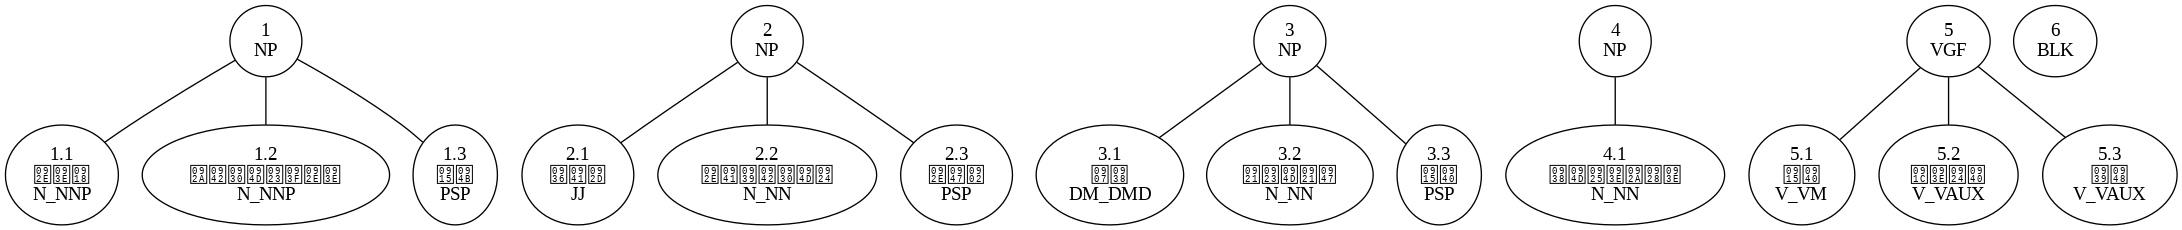

In [5]:
#test

sentence= "माघ पूर्णिमा को शुभ मुहूर्त में इस डण्डे की स्थापना की जाती है|"
lang = "hin"

parsed_text=get_response(sentence,lang)
parsed_json=text_to_json(parsed_text)
graph=visualize(parsed_json)
display_graph(graph) #does not display devnagari script -- need to fix
